<a href="https://colab.research.google.com/github/mahavisvanathan/Data-Analytics/blob/master/Transform_Centigrade_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Section
This section contains all the imports need for building and visualizing the model. It contains the following major functionalities
- Reading and manipulating data
- Visualizing the model and result
- Building the model

In [41]:
#Basic libraries to read and manipulate data
import numpy as np
import pandas as pd

#Visualisation libraries to understand the result
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from IPython.display import Image

## Model definition
Building a very simple linear regression function with a mean squared error and a simple gradient update.

In [29]:
# Simple linear regression model:
class LinearRegression(object):
    #Defining weights, biases and learning rate
    def __init__(self,w=1,b=1, lr=0.01): 
        self.lr=lr
        self.w=np.array([[w]])
        self.b=np.array([b])

    # Defining the cost function to be minimized
    def cost(self,x,y):     
        pred = x@self.w+self.b  # predicted y-values
        e=y-pred             # error term
        return np.mean(e**2)  # mean squared error

    # Function to update the weights and bias
    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b

    # Function to predict model from the input
    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values
    
    # Returns the weights and biases of the model
    def params(self):
        return (self.w,self.b)   # return parameters

## Reading and Visualizing the data

Reading the data from the give file into a dataframe using pandas

In [42]:
#Read the CSV file using pandas
data = pd.read_csv("c_to_f.csv")
# Display the top 5 entries of the data
data.head()

City   Degrees Fahrenheit  Degrees Centigrade
0      Houston                  54               12.22
1      Chicago                  37                2.78
2  Minneapolis                  31               -0.56
3        Miami                  78               25.56
4      Phoenix                  70               21.11

Visualizing how the data looks with a simple scatter plot in Matplotlib

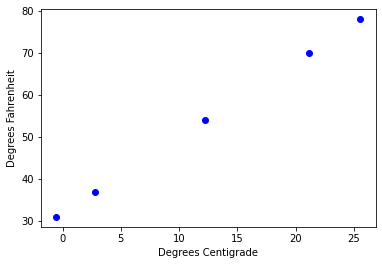

In [30]:
#Plotting the data to see how the result looks
plt.figure()
plt.scatter(
    data['Degrees Centigrade'],
    data['Degrees Fahrenheit'],
    c='blue'
)
plt.ylabel("Degrees Fahrenheit")
plt.xlabel("Degrees Centigrade")
plt.show()

## Training the model and Inferencing the results

Training the model with 60,000 epochs and a very small learning rate to visualize how the line fits into the data

In [43]:
# Introduce lists where data points are being stored: 
w_list=[]   # list contains weights
b_list=[]   # list contains biases
c_list=[]   # list contains costs 
ys_list=[]  # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = [] # list contains predicted y-values for x_train ( -> plot connecting lines!) 

xs= np.array([    # set x-values for regression line plot               
            [-3],
             [10]
             ])

# Train model: 
model=LinearRegression(w=3,b=-1,lr=0.001) # set initial parameters and learning rate 

for i in range(60000):      # set number of epochs
    w_list.append(model.params()[0])    # append weights (=slopes) to list
    b_list.append(model.params()[1])    # append biases (=y-intercepts) to list
    c_list.append(model.cost(X,y))  # append costs to list
    ys_list.append(model.predict(xs).T)     # append pairs of predicted y-values for xs 
    cl_list.append(model.predict(X).T) # append predicted y-values for x_train to list
    model.fit(X,y) # fit model


# print parameters and costs after all epochs
print("weight: " + str( model.params()[0]) )  
print("y-intercept: " + str( model.params()[1]) )
print("costs: "+ str(model.cost(X,y)))

weight: [[1.79969883]]
y-intercept: [32.00408088]
costs: 2.3398715206387144e-05


Writing a tiny snippet of code to create an animation of how the line is fitting the data

In [ ]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

# Create first animation: 
fig = plt.figure(figsize=(10,10)) # create figure
ax0=fig.add_subplot(1, 2, 1) # plot fit
ax1=fig.add_subplot(3, 2, 2)  
ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
labelsize_ = 14
camera = Camera(fig)  # create camera
for i in p:
    
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

     
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(X, y, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([20, 80 ])

    # plt.tight_layout()
    camera.snap() # take snapshot after each frame/iteration\
    


animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('SimpleLinReg_1.gif', writer = "pillow") # save animation
# For Local Image

ax0.set_visible(False)
ax1.set_visible(False)
ax2.set_visible(False)
ax3.set_visible(False)

Displaying the generated animation

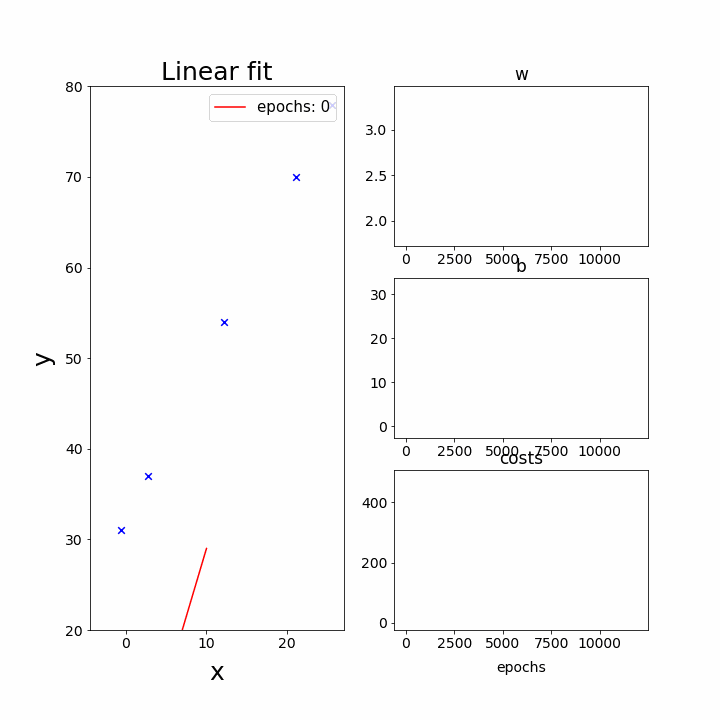

In [45]:
Image('SimpleLinReg_1.gif', format='png')

## Verifying the result

Considering that this is a formula based problem, we verify the actual prediction with the prediction obtained using the model

Results for the predicted output

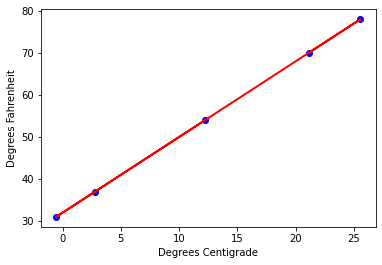

In [46]:
predictions = model.predict(X)
plt.figure()
plt.scatter(
    data['Degrees Centigrade'],
    data['Degrees Fahrenheit'],
    c='blue'
)
plt.plot(
    data['Degrees Centigrade'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel('Degrees Centigrade')
plt.ylabel('Degrees Fahrenheit')
plt.show()

Results for actual numerically calculated value

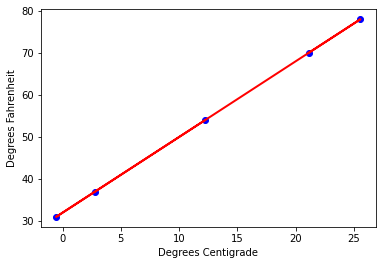

In [47]:
predictions = X*1.8 + 32
plt.figure()
plt.scatter(
    data['Degrees Centigrade'],
    data['Degrees Fahrenheit'],
    c='blue'
)
plt.plot(
    data['Degrees Centigrade'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel('Degrees Centigrade')
plt.ylabel('Degrees Fahrenheit')
plt.show()